/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

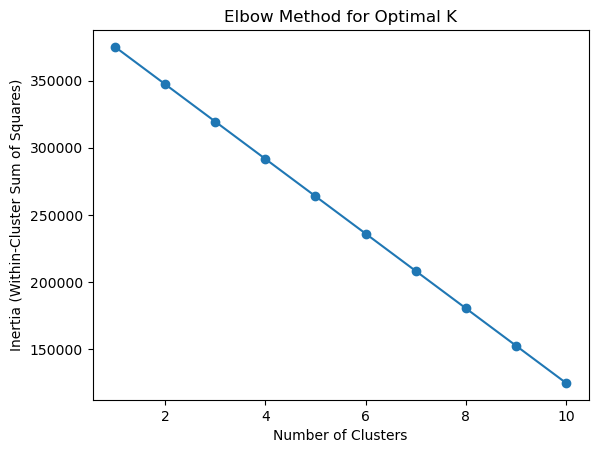

Silhouette Score: 0.1381256525030006
Cluster Assignments:
                 Recipe  Cluster
0      Chicken Stir-Fry        1
1        Broccoli Salad        2
2           Tomato Soup        0
3      Spinach Smoothie        1
4            Rice Pilaf        0
...                 ...      ...
24995     Beef Stir-Fry        1
24996     Lettuce Wraps        1
24997   Mashed Potatoes        1
24998       Carrot Soup        1
24999       Onion Rings        0

[25000 rows x 2 columns]


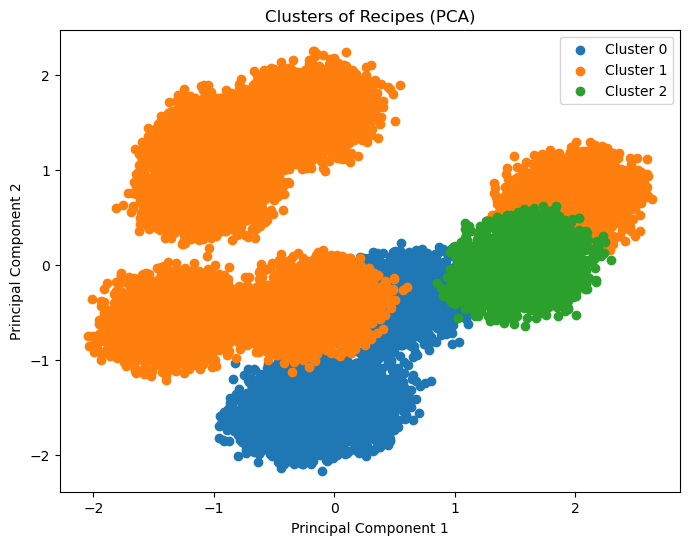

Cluster Summary:
         Calories  Carbohydrates   Proteins       Fats  \
Cluster                                                  
0        299.5384        27.9164  27.397200  27.387733   
1        299.0130        27.5460  27.763467  27.388867   
2        297.4376        27.3748  26.820800  28.061200   

                                                Ingredient  
Cluster                                                     
0        RiceSpinachOnionRiceSpinachOnionRiceSpinachOni...  
1        ChickenTomatoBeefLettucePotatoCarrotChickenTom...  
2        BroccoliBroccoliBroccoliBroccoliBroccoliBrocco...  


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_nourishnudge_data_KNN.csv')

# Select relevant features for clustering (ingredients and nutritional content)
nutritional_features = ['Quantity', 'Calories', 'Carbohydrates', 'Proteins', 'Fats']
ingredient_features = data['Ingredient'].str.get_dummies()

# Separate scaling for nutritional and ingredient features
scaler_nutritional = StandardScaler()
features_scaled_nutritional = scaler_nutritional.fit_transform(data[nutritional_features])

scaler_ingredients = StandardScaler()
features_scaled_ingredients = scaler_ingredients.fit_transform(ingredient_features)

features_scaled = np.concatenate((features_scaled_nutritional, features_scaled_ingredients), axis=1)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Determine the maximum number of clusters based on the number of samples
max_clusters = min(len(data), 10)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to choose the optimal number of clusters
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters
# You can adjust this based on the plot or set it manually
optimal_k = 3

# Apply K-means clustering with the optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Explicitly set n_init
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Continue with the rest of your code...

# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Display the cluster assignments
print("Cluster Assignments:")
print(data[['Recipe', 'Cluster']])

# Optional: Visualize the clusters using PCA (2D plot)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(features_pca[data['Cluster'] == cluster, 0], features_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Recipes (PCA)')
plt.legend()
plt.show()

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').agg({
    'Calories': 'mean',
    'Carbohydrates': 'mean',
    'Proteins': 'mean',
    'Fats': 'mean',
    'Ingredient': 'sum',  # Adjust based on the number of ingredients
    # Add more columns if needed
})

print("Cluster Summary:")
print(cluster_summary)

